<a href="https://colab.research.google.com/github/MChaerulGhazali/Analitik-dan-visualisasi-data/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Muat Kumpulan Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
from google.colab import files

# Upload file CSV
uploaded = files.upload()

# Membaca dataset
df = pd.read_csv("diamonds.csv")

# Cek data awal
print(df.head())
print(df.info())

Saving diamonds.csv to diamonds (1).csv
   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 

#Praproses

In [9]:
# Hapus baris dengan nilai kosong jika ada
df = df.dropna()

# Ubah variabel kategori ke numerik (one-hot encoding)
df_encoded = pd.get_dummies(df, columns=['cut', 'color', 'clarity'], drop_first=True)

# Fitur dan target
X = df_encoded.drop(['price'], axis=1)
y = df_encoded['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Melatih dan Mengevaluasi Regresor KNN

In [10]:
# Inisialisasi model KNN
knn = KNeighborsRegressor(n_neighbors=5)

# Latih model
knn.fit(X_train_scaled, y_train)

# Prediksi
y_pred = knn.predict(X_test_scaled)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

Mean Squared Error: 588692.73
R² Score: 0.96


#Visualisasi Hasil

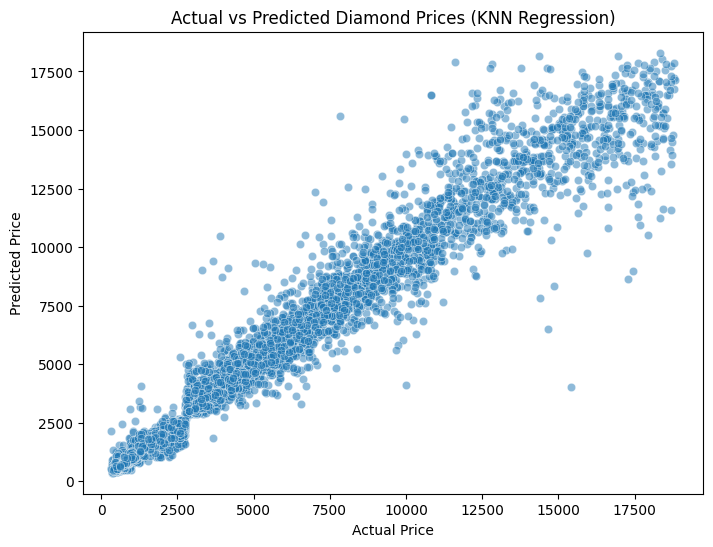

In [11]:
# Plot hasil prediksi vs aktual
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Diamond Prices (KNN Regression)")
plt.show()

#Penyetelan K

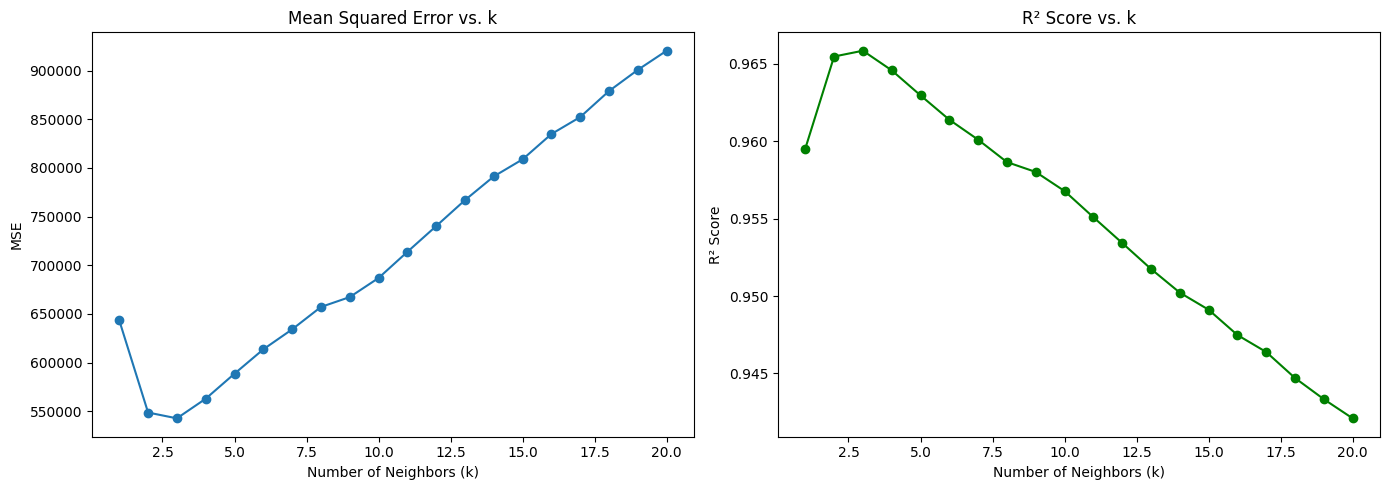

In [12]:
errors = []
r2_scores = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred_k)
    r2 = r2_score(y_test, y_pred_k)

    errors.append(mse)
    r2_scores.append(r2)

# Visualisasi error dan skor R2 terhadap k
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, errors, marker='o')
plt.title('Mean Squared Error vs. k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.plot(k_values, r2_scores, marker='o', color='green')
plt.title('R² Score vs. k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('R² Score')

plt.tight_layout()
plt.show()

#Model KNN

In [13]:
import joblib

# Model terbaik
best_k = 7
best_knn = KNeighborsRegressor(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

# Simpan model
joblib.dump(best_knn, 'best_knn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')  # Simpan juga scaler-nya

['scaler.pkl']

## Visualisasi Data

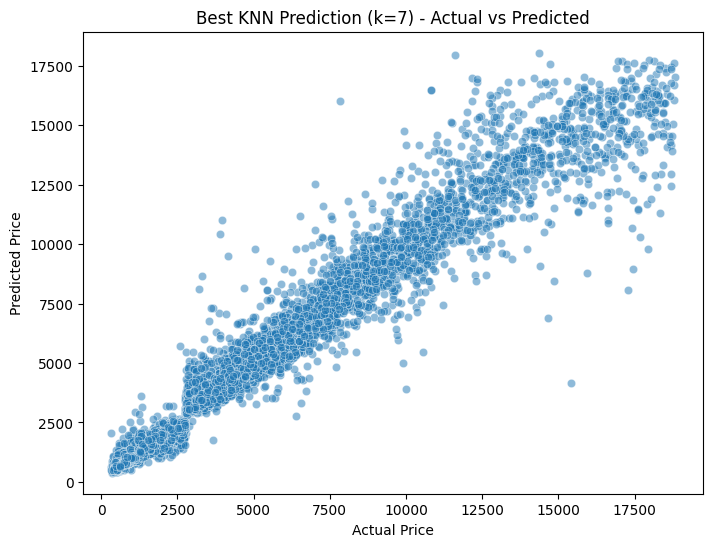

In [14]:
# Prediksi dengan model terbaik
y_best_pred = best_knn.predict(X_test_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_best_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Best KNN Prediction (k={best_k}) - Actual vs Predicted")
plt.show()